In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score,ConfusionMatrixDisplay

import numpy as np

import random
theme = ['#16A085','#DBFE87','#FFE381','#1C448E','#2D3319','#EDF184','#8E9488','#79CF86',
         '#48B886','#253C54','#BCD984','#214071','#E57A44','#7E8D65','#F2AF63','#A18261',
         '#725151','#D0B371']

mpl.rcParams['figure.dpi']= 100


In [26]:
data= pd.read_csv('../Preprocesamiento/pca_sin_datos_extra.csv')
data

,0,1,2,3,4,5,Lluvia
0,0.653493,0.458687,0.281631,0.055148,-0.198806,-0.024195,No
1,0.853502,0.068190,0.142124,-0.101978,0.003491,0.095243,No
2,0.575768,0.119471,-0.182811,-0.397025,-0.179194,-0.060744,No
3,0.542646,0.463339,0.277554,0.253758,-0.141645,-0.014698,No
4,0.670496,0.424843,0.056951,0.222195,-0.350366,-0.023192,No
...,...,...,...,...,...,...,...
75620,0.735192,0.078414,-0.191779,0.185611,0.013044,0.080042,No
75621,0.335673,0.317237,-0.329031,-0.439551,0.004475,0.231916,No
75622,0.859309,0.083848,-0.128791,0.084245,0.001598,0.218728,No
75623,0.562062,0.052994,-0.322122,0.201174,0.062786,0.058144,No


In [27]:
true_labels = data.iloc[:,-1].map(dict(Yes=1, No=0))
true_labels

0        0
1        0
2        0
3        0
4        0
        ..
75620    0
75621    0
75622    0
75623    0
75624    0
Name: Lluvia, Length: 75625, dtype: int64

In [28]:
sampled_data = data.sample(20000)
true_labels_sampled = sampled_data.iloc[:,-1].map(dict(Yes=1, No=0))

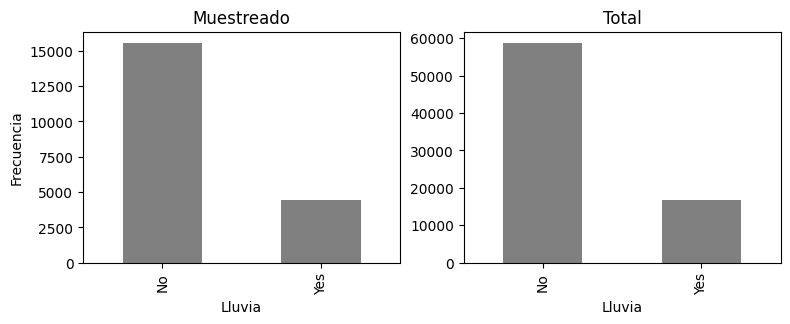

In [29]:
plt.figure(figsize=(9, 3));
plt.subplot(121);
sampled_data['Lluvia'].value_counts().plot(kind='bar',color='gray');
plt.title('Muestreado');
plt.xlabel('Lluvia');
plt.ylabel('Frecuencia');
plt.subplot(122);
data['Lluvia'].value_counts().plot(kind='bar',color='gray');
plt.title('Total');
plt.xlabel('Lluvia');

In [30]:
sampled_data['Lluvia'].value_counts()/sampled_data['Lluvia'].shape[0]

No     0.7787
Yes    0.2213
Name: Lluvia, dtype: float64

In [31]:
data['Lluvia'].value_counts()/data['Lluvia'].shape[0]


No     0.777587
Yes    0.222413
Name: Lluvia, dtype: float64

# 1. K- means clustering
K means busca separar los datos en clusters de una misma variancia, en otras palabras elige el centroide que minimice la siguiente expresión : 
$$\sum_{i=0}^n \min _{\mu_j \in C}\left(\left\|x_i-\mu_j\right\|^2\right)$$
Donde $\mu$ es el centroide del cluster, el promedio de las distancias de los elementos en el cluster. En este caso sabemos que hay 2 tipos de clases, lluvia y no lluvia, por lo que se elige k=2. Sin embargo si evaluamos el coeficiente de silueta global, debe ser máximo, y se ve que en 2 clusters es máximo.

In [32]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k,n_init='auto').fit(data.iloc[:,:-1])
  labels = kmeans.labels_
  sil.append(silhouette_score(data.iloc[:,:-1], labels, metric = 'euclidean'))

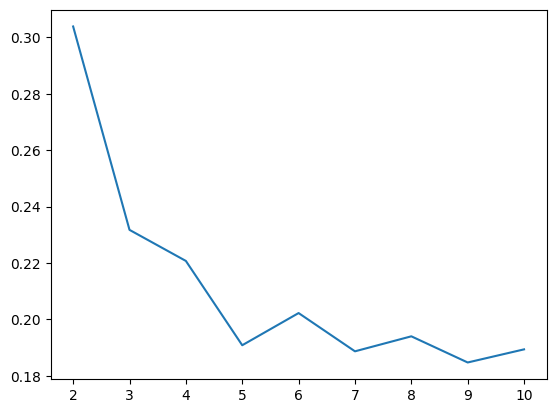

In [33]:
plt.plot([i for i in range(2,11)],sil)

In [34]:
kmeans = KMeans(n_clusters = 2,n_init='auto').fit(data.iloc[:,:-1])
kmeans_labels = kmeans.labels_

En la siguiente celda se muestran algunas métricas, como la matriz de confusion normalizada, los elementos de las columnas y las filas suman 1. Se busca que los elementos de la diagonal sumen 1 y sean máximos. 
Se muestran otras métricas como precision que es la proporción de verdaderos positivos dividido entre todos los resultados positivos $\frac{VP}{VP+FP}$ y la proporción de verdaderos negativos devidido por todos los resultados negativos $\frac{VN}{VN+FN}$, en otras palabras es la fracción de items que fue correctamente clasificado entre los items predecidos. También se muestra el recall, que es la proporción de casos positivos que fueron correctamente identificados o también los casos negativos correctamente identificados $\frac{VP}{VP+FN}$ o $\frac{VN}{VN+FP}$ en otras palabras es la proporción de items que fueron clasificados correctamente entre el total de valores reales del dataset.

Como se vio en clase F-beta es la media armonica de la precision y el recall. El valor presentado de F1 da igual importancia a la precision y al recall.

También se muestra el soporte, que es la cantidad de valores verdaderos para cada etiqueta. 

Se muestra el accuracy que es la suma de la diagonal de la matriz de confusión normalizada es decir $\frac{TP+TN}{TP+TN+FP+FN}$

En la parte inferior se ve un promedio de las medidas de recall y precision, se obtiene sumando los dos valores y dividiendo en 2.

El promedio de precision pesado se obtiene sumando todos los valores verdaderos, es decir las filas de la matriz normalizada de confusion y multiplicando por los valores de precision, y asi se obtiene un promedio pesado.

In [35]:
cm = confusion_matrix(true_labels,kmeans_labels,normalize='all')
cr = classification_report(true_labels,kmeans_labels)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(true_labels,kmeans_labels)*100))  
print(cr)

k= cohen_kappa_score(true_labels,kmeans_labels)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.43956364 0.33802314]
 [0.03993388 0.18247934]]

overall Accuracy: 62.20 %
              precision    recall  f1-score   support

           0       0.92      0.57      0.70     58805
           1       0.35      0.82      0.49     16820

    accuracy                           0.62     75625
   macro avg       0.63      0.69      0.60     75625
weighted avg       0.79      0.62      0.65     75625

kappa : 0.261


Visualmente se pueden ver las métricas antes presentadas.

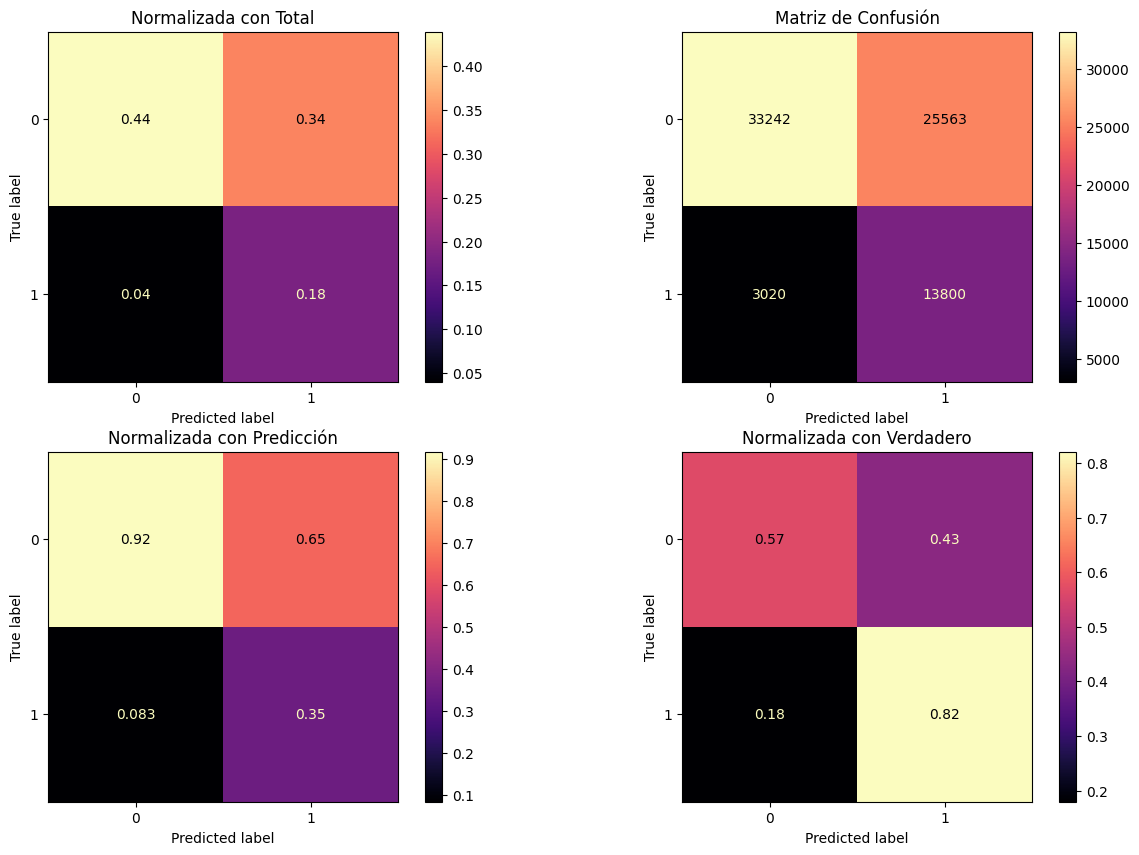

In [36]:
# confusion matrix recall and precision
# with pred we can obtain precision and from true we can obtain recall
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_title("Normalizada con Total")
ax[1][0].set_title("Normalizada con Predicción")
ax[1][1].set_title("Normalizada con Verdadero")
ax[0][1].set_title("Matriz de Confusión")

CM = [('all','Confusion Matrix Normalized',ax[0][0]),(None,'Confusion Matrix',ax[0][1]),('pred','Predicted Normalized',ax[1][0]),('true','True Normalized',ax[1][1])]

for matrix in CM:
    
    norm, name,subplot_ = matrix
    cm = confusion_matrix( true_labels,kmeans_labels,normalize=norm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
    disp.plot(cmap='magma',ax=subplot_)
    # subplot_.title('{}'.format(name))
    # plt.savefig('./images_show/ANN_{}_augmented.png'.format(name))

# 2. Agglomerative Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
AC_clustering = AgglomerativeClustering(n_clusters=2,linkage='average',metric='euclidean').fit(sampled_data.iloc[:,:-1])
labels_AC = AC_clustering.labels_

In [38]:
cm = confusion_matrix(true_labels_sampled,labels_AC,normalize='all')
cr = classification_report(true_labels_sampled,labels_AC)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(true_labels_sampled,labels_AC)*100))  
print(cr)

k= cohen_kappa_score(true_labels_sampled,labels_AC)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[7.7855e-01 1.5000e-04]
 [2.2130e-01 0.0000e+00]]

overall Accuracy: 77.85 %
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15574
           1       0.00      0.00      0.00      4426

    accuracy                           0.78     20000
   macro avg       0.39      0.50      0.44     20000
weighted avg       0.61      0.78      0.68     20000

kappa : -0.000


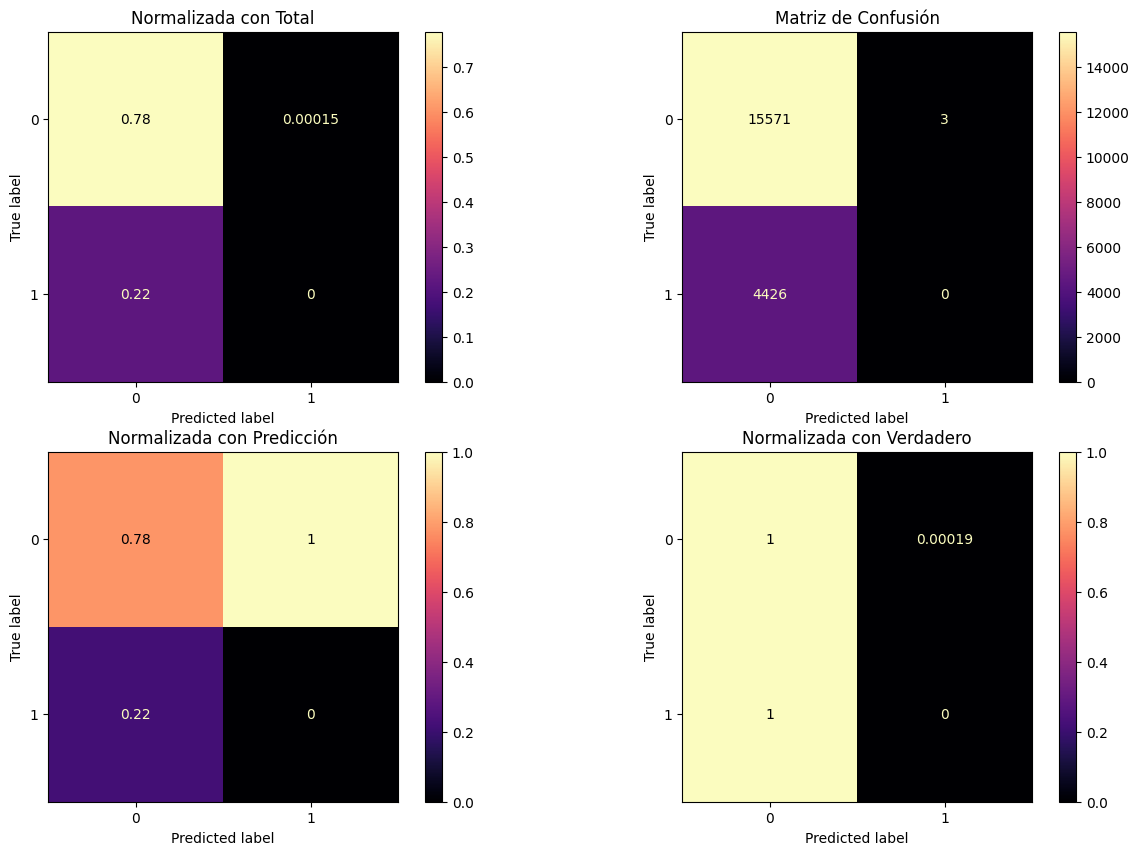

In [39]:
# confusion matrix recall and precision
# with pred we can obtain precision and from true we can obtain recall
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_title("Normalizada con Total")
ax[1][0].set_title("Normalizada con Predicción")
ax[1][1].set_title("Normalizada con Verdadero")
ax[0][1].set_title("Matriz de Confusión")

CM = [('all','Confusion Matrix Normalized',ax[0][0]),(None,'Confusion Matrix',ax[0][1]),('pred','Predicted Normalized',ax[1][0]),('true','True Normalized',ax[1][1])]

for matrix in CM:
    
    norm, name,subplot_ = matrix
    cm = confusion_matrix( true_labels_sampled,labels_AC,normalize=norm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
    disp.plot(cmap='magma',ax=subplot_)
    # subplot_.title('{}'.format(name))
    # plt.savefig('./images_show/ANN_{}_augmented.png'.format(name))

# 3. DBSCAN

In [40]:
from sklearn.cluster import DBSCAN
DBSCAN_clustering = DBSCAN(eps=1, min_samples=2,n_jobs=-1).fit(sampled_data.iloc[:,:-1])
DBSCAN_labels = DBSCAN_clustering.labels_

In [41]:
cm = confusion_matrix(true_labels_sampled,DBSCAN_labels,normalize='all')
cr = classification_report(true_labels_sampled,DBSCAN_labels)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(true_labels_sampled,DBSCAN_labels)*100))  
print(cr)

k= cohen_kappa_score(true_labels_sampled,DBSCAN_labels)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.7787 0.    ]
 [0.2213 0.    ]]

overall Accuracy: 77.87 %
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15574
           1       0.00      0.00      0.00      4426

    accuracy                           0.78     20000
   macro avg       0.39      0.50      0.44     20000
weighted avg       0.61      0.78      0.68     20000

kappa : 0.000


c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


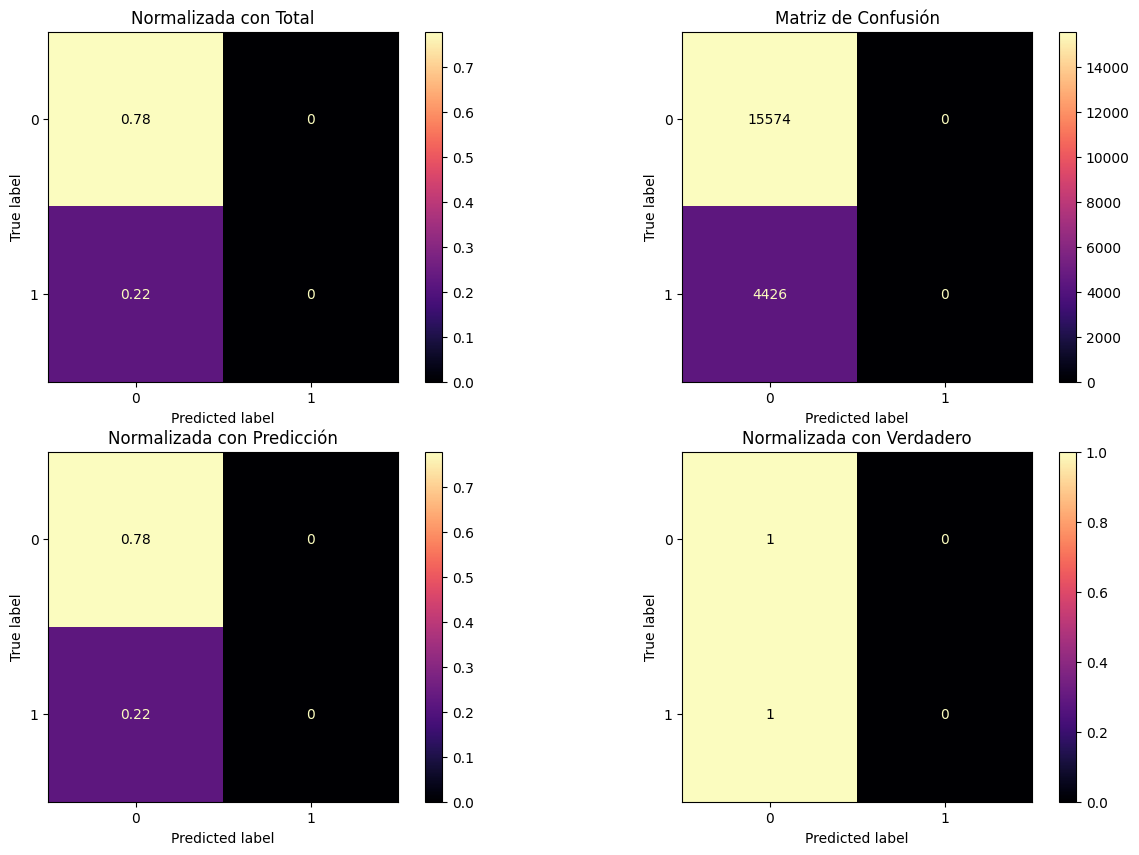

In [42]:
# confusion matrix recall and precision
# with pred we can obtain precision and from true we can obtain recall
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_title("Normalizada con Total")
ax[1][0].set_title("Normalizada con Predicción")
ax[1][1].set_title("Normalizada con Verdadero")
ax[0][1].set_title("Matriz de Confusión")

CM = [('all','Confusion Matrix Normalized',ax[0][0]),(None,'Confusion Matrix',ax[0][1]),('pred','Predicted Normalized',ax[1][0]),('true','True Normalized',ax[1][1])]

for matrix in CM:
    
    norm, name,subplot_ = matrix
    cm = confusion_matrix( true_labels_sampled,DBSCAN_labels,normalize=norm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
    disp.plot(cmap='magma',ax=subplot_)
    # subplot_.title('{}'.format(name))
    # plt.savefig('./images_show/ANN_{}_augmented.png'.format(name))

# 4. Spectral clustering

In [43]:
from sklearn.cluster import SpectralClustering
SP_clustering = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(sampled_data.iloc[:,:-1])
SP_labels = SP_clustering.labels_

In [44]:
cm = confusion_matrix(true_labels_sampled,SP_labels,normalize='all')
cr = classification_report(true_labels_sampled,SP_labels)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(true_labels_sampled,SP_labels)*100))  
print(cr)

k= cohen_kappa_score(true_labels_sampled,SP_labels)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.4369 0.3418]
 [0.0403 0.181 ]]

overall Accuracy: 61.79 %
              precision    recall  f1-score   support

           0       0.92      0.56      0.70     15574
           1       0.35      0.82      0.49      4426

    accuracy                           0.62     20000
   macro avg       0.63      0.69      0.59     20000
weighted avg       0.79      0.62      0.65     20000

kappa : 0.255


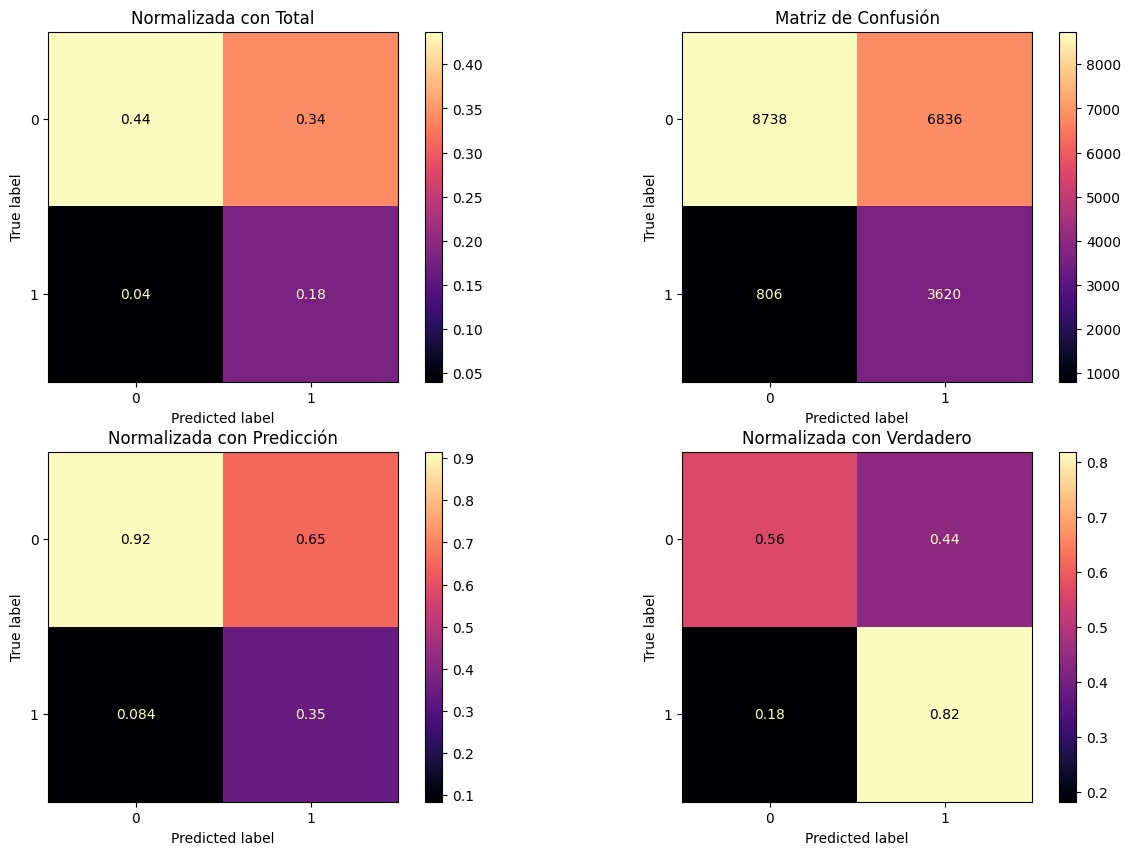

In [45]:
# confusion matrix recall and precision
# with pred we can obtain precision and from true we can obtain recall
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_title("Normalizada con Total")
ax[1][0].set_title("Normalizada con Predicción")
ax[1][1].set_title("Normalizada con Verdadero")
ax[0][1].set_title("Matriz de Confusión")

CM = [('all','Confusion Matrix Normalized',ax[0][0]),(None,'Confusion Matrix',ax[0][1]),('pred','Predicted Normalized',ax[1][0]),('true','True Normalized',ax[1][1])]

for matrix in CM:
    
    norm, name,subplot_ = matrix
    cm = confusion_matrix( true_labels_sampled,SP_labels,normalize=norm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
    disp.plot(cmap='magma',ax=subplot_)
    # subplot_.title('{}'.format(name))
    # plt.savefig('./images_show/ANN_{}_augmented.png'.format(name))